# DSI Project 2: Modeling of the Ames, Iowa Housing Dataset


## Part 2_Content:

In this Part 2 of the project, we are going to use the features that we selected in Part 1 to create regression model and to choose the model that has lower Mean Squared Error(MSE) and Root Mean Squared Error(RMSE).

- [Import Libraries & Load Data](#Import-Libraries-&-Load-Data)
- [Model Preparation & Scalling](#Model-Preparation-&-Scalling)
- [Baseline Prediction](#Baseline-Prediction)
- [Model Fitting and Evaluation](#Model-Fitting-and-Evaluation)
- [Prediction with Best Model](#Prediction-with-Best-Model)
- [Conclusion](#Conclusion)

## Import Libraries & Load Data
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Ridge, Lasso, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import RFE

In [2]:
train_c = pd.read_csv('./datasets/train_cleaned.csv')
test_c = pd.read_csv('./datasets/test_cleaned.csv')

In [3]:
train_c.head()

,Lot Area,Lot Shape,Overall Qual,Mas Vnr Area,Exter Qual,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,...,Mas Vnr Type_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Garage Type_Attchd,Garage Type_BuiltIn,Garage Type_Detchd,Garage Type_None,Sale Type_New,Sale Type_WD
0,13517,3,6,289.0,4,3,3,1,6,533.0,...,0,0,1,0,1,0,0,0,0,1
1,11492,3,7,132.0,4,4,3,1,6,637.0,...,0,0,0,1,1,0,0,0,0,1
2,7922,4,5,0.0,3,3,3,1,6,731.0,...,0,0,1,0,0,0,1,0,0,1
3,9802,4,5,0.0,3,4,3,1,1,0.0,...,0,0,0,1,0,1,0,0,0,1
4,14235,3,6,0.0,3,2,4,1,1,0.0,...,0,0,0,1,0,0,1,0,0,1


In [4]:
train_c.shape

(2049, 54)

In [5]:
test_c.head()

,Id,Lot Area,Lot Shape,Overall Qual,Mas Vnr Area,Exter Qual,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,...,Mas Vnr Type_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Garage Type_Attchd,Garage Type_BuiltIn,Garage Type_Detchd,Garage Type_None,Sale Type_New,Sale Type_WD
0,2658,9142,4,6,0.0,3,2,3,1,1,...,0,0,0,0,0,0,1,0,0,1
1,2718,9662,3,5,0.0,3,4,3,1,1,...,0,0,1,0,1,0,0,0,0,1
2,2414,17104,3,7,0.0,4,4,4,3,6,...,0,0,0,1,1,0,0,0,1,0
3,1989,8520,4,5,0.0,4,3,3,1,1,...,0,0,1,0,0,0,1,0,0,1
4,625,9500,3,6,247.0,3,4,3,1,4,...,0,0,1,0,1,0,0,0,0,1


In [6]:
test_c.shape

(879, 54)

## Model Preparation & Scalling
----

Using all 53 features as the predictors and scale the predictor in order to fit the model

In [7]:
features = [col for col in train_c.columns if col !='SalePrice']

X = train_c[features]
y = train_c['SalePrice']

In [8]:
print(X.shape , y.shape)

(2049, 53) (2049,)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42) # using default test size

#### Note that we have done the data cleaning by imputing mean to fill in the null value. This might affect the variance of the data but assume that the effect of mean imputation is not significance in this case as there is only one imputation done.

In [10]:
X_train.shape  # 75% of data

(1536, 53)

In [11]:
X_test.shape   # 25% of data

(513, 53)

In [12]:
# Scalling
ss = StandardScaler()
ss.fit(X_train)

X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

## Baseline Prediction
-----
In the baseline model, use the mean of the sale price in our training data as the prediction.

In [13]:
y_hat = np.mean(y_train)
y_hat

180512.78059895834

In [14]:
# checking the mse of the baseline model with validation data
def mse(y_hat,y_true):
    diff = y_true -y_hat
    return np.mean(diff**2) 

In [15]:
print('Validation MSE for baseline prediction: ' + str(mse(y_hat,y_test)))  #validation

Validation MSE for baseline prediction: 7274817059.24217


MSE for baseline prediction is high as we are just using the mean of the target in training dataset.

## Model Fitting and Evaluation
-----

### Linear Regression with 53 features_Model 1

In [16]:
# Function for linear regression
def lin_reg (X_train_scaled, y_train, X_test_scaled, y_test):
    lr = LinearRegression()
    lr.fit(X_train_scaled, y_train)
    print('Linear Regression Training R2: ' + str(lr.score(X_train_scaled,y_train)))
    print('Linear Regression Validation R2: ' + str(lr.score(X_test_scaled,y_test)))
    print('Linear Regression Estimated R2: ' + str((cross_val_score(lr, X_train_scaled,y_train,cv=10)).mean()))
    print('\n')
    print('Linear Regression Training MSE: ' + str(mean_squared_error(y_train,lr.predict(X_train_scaled))))
    print('Linear Regression Validation MSE: ' + str(mean_squared_error(y_test,lr.predict(X_test_scaled))))
    print('Linear Regression Estimated MSE: ' + 
          str((-cross_val_score(lr, X_train_scaled,y_train,cv=10,scoring='neg_mean_squared_error')).mean()))
    
    print('Linear Regression Estimated RMSE: ' + 
          str(np.sqrt((-cross_val_score(lr, X_train_scaled,y_train,cv=10,scoring='neg_mean_squared_error')).mean())))

In [17]:
lin_reg(X_train_scaled, y_train, X_test_scaled, y_test)

Linear Regression Training R2: 0.8713431600864785
Linear Regression Validation R2: 0.8810314314974069
Linear Regression Estimated R2: 0.8198752801333749


Linear Regression Training MSE: 765602068.8275162
Linear Regression Validation MSE: 863889493.4596654
Linear Regression Estimated MSE: 994572610.0431755
Linear Regression Estimated RMSE: 31536.84527728123


- Comparing training R2 and validation R2, underfitting observed on this model as the validation R2 is higher than training R2.
- Even though the MSE is lower than the MSE in baseline model, the MSE from Linear Regression is still in a very large scale. 

### Ridge Regression with 53 features_Model 2

In [18]:
# Function for ridge regression
def ridge_reg (X_train_scaled, y_train, X_test_scaled, y_test):
    ridge = RidgeCV(alphas=np.logspace(0.1,10,100),cv=10)  # find the alpha to be use
    ridge.fit(X_train_scaled,y_train)
    
    # use the alpha to fit again so that can use all the data
    alpha = ridge.alpha_
    print('alpha: ',alpha)
    
    ridge_a = Ridge(alpha=alpha)
    ridge_a.fit(X_train_scaled,y_train)
    
    # evaluate the model    
    print('Ridge Regression Training R2: ' + str(ridge_a.score(X_train_scaled,y_train)))
    print('Ridge Regression Validation R2: ' + str(ridge_a.score(X_test_scaled,y_test)))
    print('Ridge Regression Estimated R2: ' + str((cross_val_score(ridge_a, X_train_scaled,y_train,cv=10)).mean()))
    print('\n')
    print('Ridge Regression Training MSE: ' + str(mean_squared_error(y_train,ridge_a.predict(X_train_scaled))))
    print('Ridge Regression Validation MSE: ' + str(mean_squared_error(y_test,ridge_a.predict(X_test_scaled))))
    print('Ridge Regression Estimated MSE: ' + 
          str((-cross_val_score(ridge_a, X_train_scaled,y_train,cv=10,scoring='neg_mean_squared_error')).mean()))
    
    print('Ridge Regression Estimated RMSE: ' + 
          str(np.sqrt((-cross_val_score(ridge_a, X_train_scaled,y_train,cv=10,scoring='neg_mean_squared_error')).mean())))  

In [19]:
ridge_reg(X_train_scaled, y_train, X_test_scaled, y_test)

alpha:  501.18723362727246
Ridge Regression Training R2: 0.8614245829676239
Ridge Regression Validation R2: 0.8674083154456624
Ridge Regression Estimated R2: 0.831624301123535


Ridge Regression Training MSE: 824624839.5338736
Ridge Regression Validation MSE: 962813662.8719193
Ridge Regression Estimated MSE: 948345517.5216703
Ridge Regression Estimated RMSE: 30795.219069226805


As compare to Model 1 Linear Regresssion:
- R2 on both training and validation are higher/better than Linear Regression. Underfitting still observed in this model as regularization are more useful in reducing overfitting.
- MSE & RMSE are lower and better than Linear Regression.

                        Model 2 Ridge Regression is better than Model 1 Linear Regression

### Lasso Regression with 53 Features_Model 3

In [20]:
# Function for lasso regression
def lasso_reg (X_train_scaled, y_train, X_test_scaled, y_test):
    lasso = LassoCV(n_alphas=500,cv=10,max_iter=100000)  # find the alpha
    lasso.fit(X_train_scaled,y_train)
    
    # use the alpha to fit 
    alpha = lasso.alpha_
    print('alpha: ', alpha)
    
    lasso_a = Lasso(alpha=alpha,max_iter=100000)
    lasso_a.fit(X_train_scaled,y_train)
    
    # evaluate the model
    print('Lasso Regression Training R2: ' + str(lasso_a.score(X_train_scaled,y_train)))
    print('Lasso Regression Validation R2: ' + str(lasso_a.score(X_test_scaled,y_test)))
    print('Lasso Regression Estimated R2: ' + str((cross_val_score(lasso_a, X_train_scaled,y_train,cv=10)).mean()))
    print('\n')
    print('Lasso Regression Training MSE: ' + str(mean_squared_error(y_train,lasso_a.predict(X_train_scaled))))
    print('Lasso Regression Validation MSE: ' + str(mean_squared_error(y_test,lasso_a.predict(X_test_scaled))))
    print('Lasso Regression Estimated MSE: ' + 
          str((-cross_val_score(lasso_a, X_train_scaled,y_train,cv=10,scoring='neg_mean_squared_error')).mean()))
    
    print('Lasso Regression Estimated RMSE: ' + 
          str(np.sqrt((-cross_val_score(lasso_a, X_train_scaled,y_train,cv=10,scoring='neg_mean_squared_error')).mean())))

In [21]:
lasso_reg(X_train_scaled, y_train, X_test_scaled, y_test)

alpha:  1172.9229946846488
Lasso Regression Training R2: 0.8642369319557133
Lasso Regression Validation R2: 0.8749662314574309
Lasso Regression Estimated R2: 0.8244000336320466


Lasso Regression Training MSE: 807889311.0925303
Lasso Regression Validation MSE: 907931904.4612925
Lasso Regression Estimated MSE: 976173632.1318712
Lasso Regression Estimated RMSE: 31243.777494596765


As compared to Model 2 Ridge Regression: 
- R2 on both training and validation are lower 
- MSE & RMSE are higher which means Ridge Regression perform better 

                            Model 2 Ridge Regression is better than Model 3 Lasso Regression

### Elastic Net with 53 Features_Model 4

Note: l1_ratio :amount of ridge vs. lasso (0 = all ridge, 1 = all lasso)

In [22]:
# Function for elastic net regression
def elasticnet_reg (X_train_scaled, y_train, X_test_scaled, y_test):
    enet = ElasticNetCV(l1_ratio=np.linspace(0.01, 1.0, 25), n_alphas=500,cv=10,max_iter=100000)  # find the ratio & alpha
    enet.fit(X_train_scaled,y_train)
    
    # use the optimal ratio & alpha to fit
    ratio = enet.l1_ratio_
    alpha = enet.alpha_
    print('l1_ratio: ', ratio)
    print('alpha: ', alpha)
    
    enet_a = ElasticNet(alpha=alpha, l1_ratio=ratio)
    enet_a.fit(X_train_scaled,y_train)
    
    # evaluate the model
    print('ElasticNet Regression Training R2: ' + str(enet_a.score(X_train_scaled,y_train)))
    print('ElasticNet Regression Validation R2: ' + str(enet_a.score(X_test_scaled,y_test)))
    print('ElasticNet Regression Estimated R2: ' + str((cross_val_score(enet_a, X_train_scaled,y_train,cv=10)).mean()))
    print('\n')
    print('ElasticNet Regression Training MSE: ' + str(mean_squared_error(y_train,enet_a.predict(X_train_scaled))))
    print('ElasticNet Regression Validation MSE: ' + str(mean_squared_error(y_test,enet_a.predict(X_test_scaled))))
    print('ElasticNet Regression Estimated MSE: ' + 
          str((-cross_val_score(enet_a, X_train_scaled,y_train,cv=10,scoring='neg_mean_squared_error')).mean()))
    print('ElasticNet Regression Estimated RMSE: ' + 
          str(np.sqrt((-cross_val_score(enet_a, X_train_scaled,y_train,cv=10,scoring='neg_mean_squared_error')).mean())))

In [23]:
elasticnet_reg(X_train_scaled, y_train, X_test_scaled, y_test)

l1_ratio:  1.0
alpha:  1172.9229946846488
ElasticNet Regression Training R2: 0.8642369319557133
ElasticNet Regression Validation R2: 0.8749662314574309
ElasticNet Regression Estimated R2: 0.8244000336320466


ElasticNet Regression Training MSE: 807889311.0925303
ElasticNet Regression Validation MSE: 907931904.4612925
ElasticNet Regression Estimated MSE: 976173632.1318712
ElasticNet Regression Estimated RMSE: 31243.777494596765


With Elastic Net CV, optimal l1_ratio is 1 which indicates that it is equivalent with Lasso. The result of this model is similar to Lasso and thus, among all 4 models with 53 features, Ridge Regression is the best model.


### Regularization/Feature Selection  with Lasso

Regularization will helps to reduce the multicolinearity in the data. Assume that after regularization, the features that has been selected in Lasso will fit the Linear Regression better as it reduces the multicolinearity in the data. 

Along reducing of the coefficients, Lasso also perform feature selection. If the coeficient of a particular feature is 0, it is equivalent to the feature is being excluded from the model.

Checking the coefficient of the features in Lasso

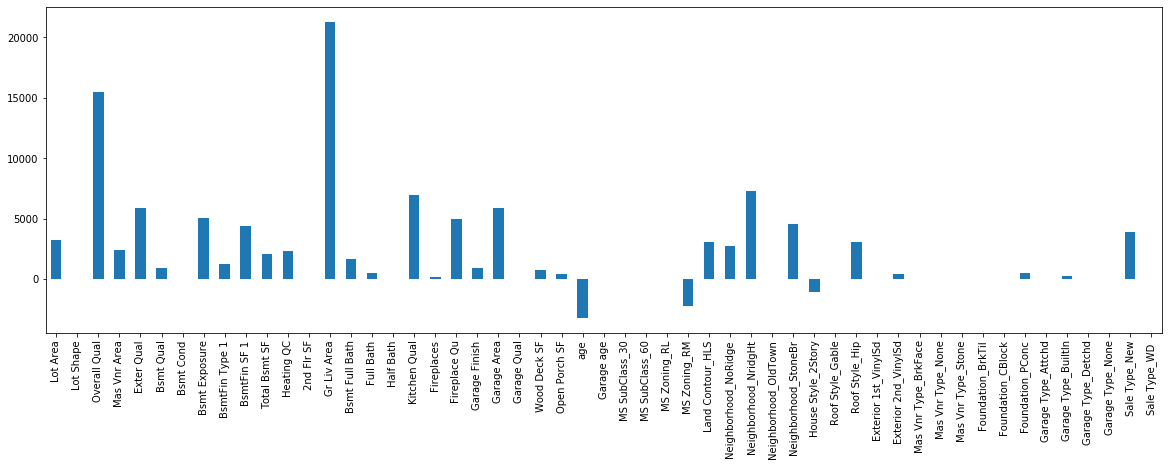

In [24]:
# lasso.coef_ 
    
lasso_a = Lasso(alpha=1172.9229946846488)
lasso_a.fit(X_train_scaled,y_train)
    
# checking the coefficient
pd.Series(lasso_a.coef_,index=X.columns).plot.bar(figsize=(20,6));

In [25]:
sub_lasso_co = pd.DataFrame({'coef':lasso_a.coef_,'features':X.columns})
sub_features = sub_lasso_co[sub_lasso_co['coef']!=0]
sub_features

,coef,features
0,3207.702972,Lot Area
2,15477.368820,Overall Qual
3,2391.640817,Mas Vnr Area
4,5872.263574,Exter Qual
5,943.330555,Bsmt Qual
7,5052.052541,Bsmt Exposure
8,1216.610630,BsmtFin Type 1
9,4378.424036,BsmtFin SF 1
10,2082.596964,Total Bsmt SF
11,2300.861789,Heating QC


In [26]:
sub_lasso_f = sub_features['features']
len(sub_lasso_f)

33

Total of 33 features has been selected by Lasso from total of 53 features

### Linear Regression with Features Selected from Lasso_Model 5
With the features selected from Lasso, it should fit the Linear Regression better.

In [27]:
X_subls = X_train[sub_lasso_f]

In [28]:
X_subls_test = X_test[sub_lasso_f]

In [29]:
# Scalling
ss = StandardScaler()
ss.fit(X_subls)

Xsubls_train_scaled = ss.transform(X_subls)
Xsubls_test_scaled = ss.transform(X_subls_test)

In [30]:
lin_reg(Xsubls_train_scaled, y_train, Xsubls_test_scaled, y_test)

Linear Regression Training R2: 0.8669168794495028
Linear Regression Validation R2: 0.8800264516886461
Linear Regression Estimated R2: 0.824037344937933


Linear Regression Training MSE: 791941668.1458077
Linear Regression Validation MSE: 871187147.8641449
Linear Regression Estimated MSE: 974197236.4494388
Linear Regression Estimated RMSE: 31212.132840442653


With the subset of features, Linear Regression did perform better with higher R2 and lower MSE as compare to Linear Regression with 53 features.

## Prediction with Best Model
----

### Prediction with Model 5 Linear regression with 33 Features

In [31]:
X_test_l = test_c[sub_lasso_f]
X_sub = X[sub_lasso_f]

In [32]:
# Scalling
ss = StandardScaler()
ss.fit(X_sub)

Xsub_scaled = ss.transform(X_sub)
X1_test_scaled = ss.transform(X_test_l)

In [33]:
lr = LinearRegression()
lr.fit(Xsub_scaled,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
y_preds_lr = lr.predict(X1_test_scaled)

In [35]:
lr_test_submission = pd.DataFrame({'Id': test_c['Id'],'SalePrice':y_preds_lr})

In [36]:
lr_test_submission.head()

,Id,SalePrice
0,2658,129605.694585
1,2718,163027.666305
2,2414,233949.376108
3,1989,101061.795288
4,625,174197.218481


In [37]:
lr_test_submission.to_csv('./datasets/lr_test_submission.csv', index=False)

### Kaggle Score: 30907.43847

## Conclusion
-------

|Model No|Model|Estimated R2|Estimated MSE|Estimated RMSE|
|--------|-----|------------|-------------|-------------|
|1|Linear Regression (53 features)|0.8199|994572610.04|31536.85|
|2|Ridge Regression (53 features)|0.8316|948345517.52|30795.22|
|3|Lasso Regression (53 features)|0.8244|976173632.13|31243.78|
|4|ElasticNet (53 features)|0.8244|976173632.13|31243.78|
|5|Linear Regression (33 features)|0.8240|974197236.45|31212.13|


There are total 5 models created in this project. Among the 4 models (Linear,Ridge,Lasso, and ElasticNet) with 53 features, Ridge Regression performed better with highest estimated R2 score and lowest estimated MSE. In both Linear Regression, model with features selected after Lasso regularization perform better in terms of R2 and MSE. 

Best model among all 5 models created will be Ridge Regression (53 features) by looking only at the R2 and MSE scores. However, considering the model will be frequently used in the company to predict the sale price of the house, the least complex model would be better as less predictors(features) is needed. Looking at Model 5 Linear Regression with 33 features, MSE is the second lowest. Thus, Model 5 Linear Regresssion with 33 features would be the ideal model to be used for prediction.
